# The Mathematical Engineering of Deep Learning

## Practical 1 (Julia version)
**For an R or Python version see the [course website](https://deeplearningmath.org/)**.

---

In this practical we will carry out some basic EDA and analysis of some popular ML Datasets that will be used in the course.

---

In [1]:
# Run these if you haven't installed the packages earlier.
# import Pkg; 
# Pkg.add("MLDatasets")
# Pkg.add("Plots")
# Pkg.add("PyPlot")
# Pkg.add("ImageCore")
# Pkg.add("StatsBase")
# Pkg.build() 
# # Pkg.precompile() #optional - but saves time from doing a full precompile on first run

### Fashion MNIST

In [2]:
using MLDatasets
fashionMNISTtrain_x, fashionMNISTtrain_y = FashionMNIST.traindata()
fashionMNISTtest_x,  fashionMNISTtest_y  = FashionMNIST.testdata()
classNames = FashionMNIST.classnames()

10-element Array{String,1}:
 "T-Shirt"
 "Trouser"
 "Pullover"
 "Dress"
 "Coat"
 "Sandal"
 "Shirt"
 "Sneaker"
 "Bag"
 "Ankle boot"

In [3]:
typeof(fashionMNISTtest_x)

Base.ReinterpretArray{FixedPointNumbers.Normed{UInt8,8},3,UInt8,Array{UInt8,3}}

In [4]:
size(fashionMNISTtrain_x)

(28, 28, 60000)

In [5]:
fashionMNISTtest_x[22,2,3535]

0.02N0f8

In [6]:
typeof(fashionMNISTtest_x[24,2,3535])

FixedPointNumbers.Normed{UInt8,8}

### Here is the first image of the training set

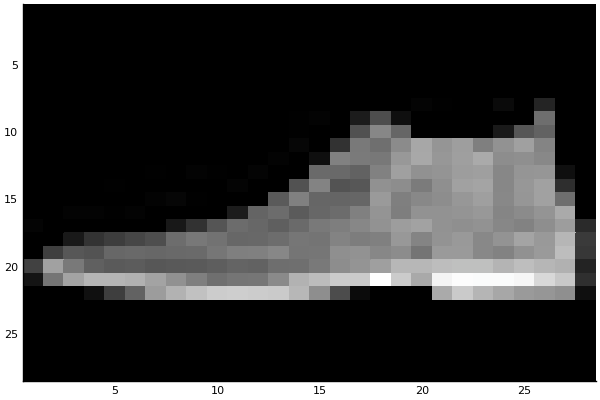

In [7]:
using Plots; pyplot()
heatmap(fashionMNISTtest_x[:,:,1]',yflip=true,legend=false,color=:greys)

In [8]:
using ImageCore
FashionMNIST.convert2image(fashionMNISTtest_x[:,:,1])

In [9]:
fashionMNISTtrain_y[1]+1

10

In [10]:
classNames[fashionMNISTtrain_y[1]+1] #The +1 is because the labels start at 0 and in Julia arrays start at 1

"Ankle boot"

**Task 1:** Present the second image of the training set in the same way as done for the first.

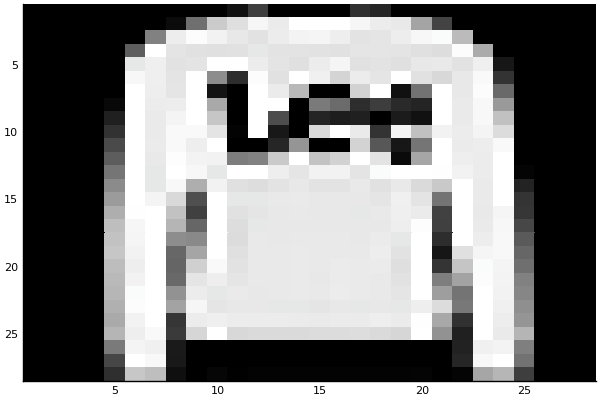

In [11]:
#Solution:
heatmap(fashionMNISTtest_x[:,:,2]',yflip=true,legend=false,color=:greys)

### Lets see if the data is balanced

In [12]:
using StatsBase

In [13]:
? counts

search: counts addcounts! codeunits countlines count_ones ncodeunits count_zeros



```
counts(x, [wv::AbstractWeights])
counts(x, levels::UnitRange{<:Integer}, [wv::AbstractWeights])
counts(x, k::Integer, [wv::AbstractWeights])
```

Count the number of times each value in `x` occurs. If `levels` is provided, only values falling in that range will be considered (the others will be ignored without raising an error or a warning). If an integer `k` is provided, only values in the range `1:k` will be considered.

If a weighting vector `wv` is specified, the sum of the weights is used rather than the raw counts.

The output is a vector of length `length(levels)`.


In [14]:
counts([1,2,2,2,2,3,4,5])

5-element Array{Int64,1}:
 1
 4
 1
 1
 1

In [15]:
using StatsBase
counts(fashionMNISTtrain_y)

10-element Array{Int64,1}:
 6000
 6000
 6000
 6000
 6000
 6000
 6000
 6000
 6000
 6000

**Task 2:** Do the same for the test set labels.

In [18]:
length(fashionMNISTtest_y)

10000

In [19]:
counts(fashionMNISTtest_y)

10-element Array{Int64,1}:
 1000
 1000
 1000
 1000
 1000
 1000
 1000
 1000
 1000
 1000

### Is it the same for MNIST?

In [20]:
? @show

```
@show
```

Show an expression and result, returning the result. See also [`show`](@ref).


In [21]:
@show 1+1.0

1 + 1.0 = 2.0


2.0

In [22]:
using ImageCore
digitsMNISTtrain_x, digitsMNISTtrain_y = MNIST.traindata()
digitsMNISTtest_x,  digitsMNISTtest_y  = MNIST.testdata()
@show size(digitsMNISTtrain_x)
@show size(digitsMNISTtest_x)
@show digitsMNISTtrain_y[1]
MNIST.convert2image(digitsMNISTtrain_x[:,:,1])

size(digitsMNISTtrain_x) = (28, 28, 60000)
size(digitsMNISTtest_x) = (28, 28, 10000)
digitsMNISTtrain_y[1] = 5


In [23]:
counts(digitsMNISTtrain_y)

10-element Array{Int64,1}:
 5923
 6742
 5958
 6131
 5842
 5421
 5918
 6265
 5851
 5949

In [24]:
counts(digitsMNISTtest_y)

10-element Array{Int64,1}:
  980
 1135
 1032
 1010
  982
  892
  958
 1028
  974
 1009

Answer: It is close to balanced (but we can still call that balanced).

### A rough comparison of the training and test set

In [25]:
sum(digitsMNISTtrain_x[:,:,1])/(28*28)

0.13768007202881152

In [26]:
mean(digitsMNISTtrain_x[:,:,1])

0.13768007f0

In [27]:
using Statistics
methods(mean)

# 10 methods for generic function "mean":
[1] mean(r::AbstractRange{var"#s828"} where var"#s828"<:Real) in Statistics at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/Statistics/src/Statistics.jl:185
[2] mean(a::StaticArrays.StaticArray; dims) in StaticArrays at /Users/uqjnazar/.julia/packages/StaticArrays/LJQEe/src/mapreduce.jl:274
[3] mean(A::AbstractArray{T,N} where N, w::AbstractWeights{W,T,V} where V<:AbstractArray{T,1} where T<:Real, dims::Int64) where {T<:Number, W<:Real} in StatsBase at deprecated.jl:70
[4] mean(A::AbstractArray; dims) in Statistics at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/Statistics/src/Statistics.jl:164
[5] mean(f::Function, a::StaticArrays.StaticArray; dims) in StaticArrays at /Users/uqjnazar/.julia/packages/StaticArrays/LJQEe/src/mapreduce.jl:275
[6] mean(A::AbstractArray, w::UnitWeights; dims) in StatsBase at /Users/uqjnazar/.julia/packages/StatsBase/EA8Mh/src/weights.jl:625
[7] mean(A::AbstractArray, w::AbstractWeights; dims) in StatsBase at /Users/uqjnazar/.julia/packages/StatsBase/EA8Mh/src/weights.jl:618
[8] mean(itr) in Statistics at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/Statistics/src/Statistics.jl:44
[9] mean(f, A::AbstractArray; dims) in Statistics at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/Statistics/src/Statistics.jl:104
[10] mean(f, itr) in Statistics at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/Statistics/src/Statistics.jl:61

In [28]:
[i^2 for i in 1:10] #comprhension

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [29]:
[1,2,3] .== 3

3-element BitArray{1}:
 0
 0
 1

In [30]:
using Statistics
meansTrain = [mean(digitsMNISTtrain_x[:,:,digitsMNISTtrain_y .== k]) for k in 0:9]

10-element Array{Float32,1}:
 0.17339931
 0.075998634
 0.14897512
 0.14153014
 0.12136559
 0.1287494
 0.13730177
 0.11452771
 0.15015598
 0.12258995

In [31]:
meansTest = [mean(digitsMNISTtest_x[:,:,digitsMNISTtest_y .== k]) for k in 0:9]

10-element Array{Float32,1}:
 0.17231035
 0.07673749
 0.15018502
 0.14330529
 0.1226675
 0.13205391
 0.14357606
 0.11490118
 0.1531272
 0.12526645

In [32]:
? sort

search: sort sort! sortperm sortperm! sortslices Cshort issorted @shorthands



```
sort(v; alg::Algorithm=defalg(v), lt=isless, by=identity, rev::Bool=false, order::Ordering=Forward)
```

Variant of [`sort!`](@ref) that returns a sorted copy of `v` leaving `v` itself unmodified.

# Examples

```jldoctest
julia> v = [3, 1, 2];

julia> sort(v)
3-element Array{Int64,1}:
 1
 2
 3

julia> v
3-element Array{Int64,1}:
 3
 1
 2
```

---

```
sort(A; dims::Integer, alg::Algorithm=DEFAULT_UNSTABLE, lt=isless, by=identity, rev::Bool=false, order::Ordering=Forward)
```

Sort a multidimensional array `A` along the given dimension. See [`sort!`](@ref) for a description of possible keyword arguments.

To sort slices of an array, refer to [`sortslices`](@ref).

# Examples

```jldoctest
julia> A = [4 3; 1 2]
2×2 Array{Int64,2}:
 4  3
 1  2

julia> sort(A, dims = 1)
2×2 Array{Int64,2}:
 1  2
 4  3

julia> sort(A, dims = 2)
2×2 Array{Int64,2}:
 3  4
 1  2
```


In [39]:
? sort!

search: sort! partialsort! sortperm! partialsortperm! setproperty! showgradient!



```
sort!(v; alg::Algorithm=defalg(v), lt=isless, by=identity, rev::Bool=false, order::Ordering=Forward)
```

Sort the vector `v` in place. [`QuickSort`](@ref) is used by default for numeric arrays while [`MergeSort`](@ref) is used for other arrays. You can specify an algorithm to use via the `alg` keyword (see [Sorting Algorithms](@ref) for available algorithms). The `by` keyword lets you provide a function that will be applied to each element before comparison; the `lt` keyword allows providing a custom "less than" function; use `rev=true` to reverse the sorting order. These options are independent and can be used together in all possible combinations: if both `by` and `lt` are specified, the `lt` function is applied to the result of the `by` function; `rev=true` reverses whatever ordering specified via the `by` and `lt` keywords.

# Examples

```jldoctest
julia> v = [3, 1, 2]; sort!(v); v
3-element Array{Int64,1}:
 1
 2
 3

julia> v = [3, 1, 2]; sort!(v, rev = true); v
3-element Array{Int64,1}:
 3
 2
 1

julia> v = [(1, "c"), (3, "a"), (2, "b")]; sort!(v, by = x -> x[1]); v
3-element Array{Tuple{Int64,String},1}:
 (1, "c")
 (2, "b")
 (3, "a")

julia> v = [(1, "c"), (3, "a"), (2, "b")]; sort!(v, by = x -> x[2]); v
3-element Array{Tuple{Int64,String},1}:
 (3, "a")
 (2, "b")
 (1, "c")
```

---

```
sort!(A; dims::Integer, alg::Algorithm=defalg(A), lt=isless, by=identity, rev::Bool=false, order::Ordering=Forward)
```

Sort the multidimensional array `A` along dimension `dims`. See [`sort!`](@ref) for a description of possible keyword arguments.

To sort slices of an array, refer to [`sortslices`](@ref).

!!! compat "Julia 1.1"
    This function requires at least Julia 1.1.


# Examples

```jldoctest
julia> A = [4 3; 1 2]
2×2 Array{Int64,2}:
 4  3
 1  2

julia> sort!(A, dims = 1); A
2×2 Array{Int64,2}:
 1  2
 4  3

julia> sort!(A, dims = 2); A
2×2 Array{Int64,2}:
 1  2
 3  4
```


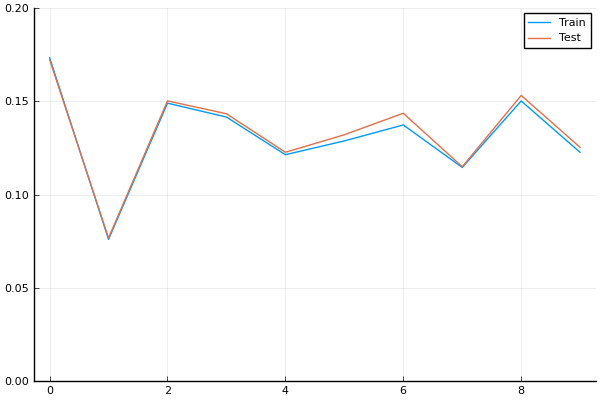

In [33]:
plot(0:9,meansTrain,label="Train")
plot!(0:9,meansTest,label="Test",ylim=(0,0.2))

**Task 3:** Do the same for Fashion MNIST

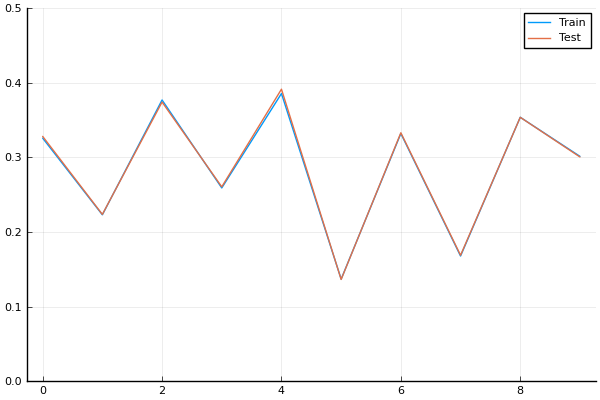

In [34]:
using Statistics, Plots; pyplot()
meansFashionTrain = [mean(fashionMNISTtrain_x[:,:,fashionMNISTtrain_y .== k]) for k in 0:9]
meansFashionTest = [mean(fashionMNISTtest_x[:,:,fashionMNISTtest_y .== k]) for k in 0:9]
plot(0:9,meansFashionTrain,label="Train")
plot!(0:9,meansFashionTest,label="Test",ylim=(0,0.5))

### Some linear binary classification

Start with digit '3' being 'positive' and digit '8' being negative

In [35]:
positiveTrain = digitsMNISTtrain_x[:,:,digitsMNISTtrain_y .== 3] #select the images that are '3'
nPos = size(positiveTrain)[3]
negativeTrain = digitsMNISTtrain_x[:,:,digitsMNISTtrain_y .== 8] #select '8'
nNeg = size(negativeTrain)[3]
@show nPos, nNeg;

(nPos, nNeg) = (6131, 5851)


In [36]:
vec([1 2; 3 4])

4-element Array{Int64,1}:
 1
 3
 2
 4

In [37]:
? vec

search: vec Vector VecOrMat VecElement cvec BitVector DenseVector DenseVecOrMat



```
vec(a::AbstractArray) -> AbstractVector
```

Reshape the array `a` as a one-dimensional column vector. Return `a` if it is already an `AbstractVector`. The resulting array shares the same underlying data as `a`, so it will only be mutable if `a` is mutable, in which case modifying one will also modify the other.

# Examples

```jldoctest
julia> a = [1 2 3; 4 5 6]
2×3 Array{Int64,2}:
 1  2  3
 4  5  6

julia> vec(a)
6-element Array{Int64,1}:
 1
 4
 2
 5
 3
 6

julia> vec(1:3)
1:3
```

See also [`reshape`](@ref).


In [38]:
#making a vector out of an image
Float32.(vec(positiveTrain[:,:,1])) #. is the broadcast operator

784-element Array{Float32,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [39]:
#A data matrix of positive samples
tempPos = vcat([Float32.(vec(positiveTrain[:,:,i]))' for i in 1:nPos]...)  

6131×784 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

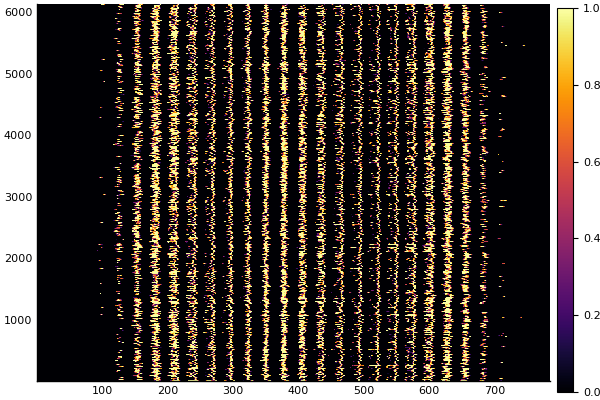

In [40]:
heatmap(tempPos)

In [42]:
tempNeg = vcat([Float32.(vec(negativeTrain[:,:,i]))' for i in 1:nNeg]...)

5851×784 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [43]:
ones(nPos+nNeg) #This will be for the intercept (bias) term

11982-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [44]:
#The dataMatrix (in statistics = design matrix)
A = hcat(ones(nPos+nNeg),vcat(tempPos,tempNeg))
@show size(A)
A

size(A) = (11982, 785)


11982×785 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  

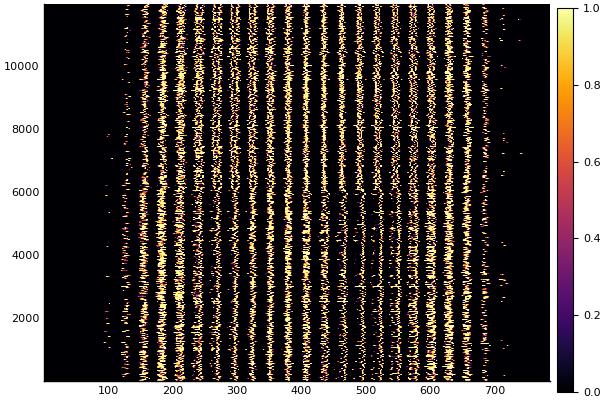

In [45]:
heatmap(A)

In [46]:
nPos

6131

In [47]:
nNeg

5851

In [48]:
y = vcat(fill(+1,nPos),fill(-1,nNeg)) #These are the labels

11982-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

We now minimize
$$
||y - A \beta ||^2
$$
with
$$
\hat{\beta} = A^\dagger y.
$$

In [ ]:
ϵ  η  β

In [49]:
using LinearAlgebra
β = pinv(A)*y  #use \beta +[TAB] to get a β character

785-element Array{Float64,1}:
  0.2987432873524592
  4.2556719302901376e-12
 -2.643873035393093e-11
 -9.037203207888133e-11
  7.604479009643594e-11
  1.8198085214592848e-11
 -6.340822969999055e-11
  1.458221199413348e-11
 -2.403963059624386e-11
 -1.1429367629369376e-10
 -9.098817883498137e-11
 -8.467390019323081e-12
  1.579101874535701e-10
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

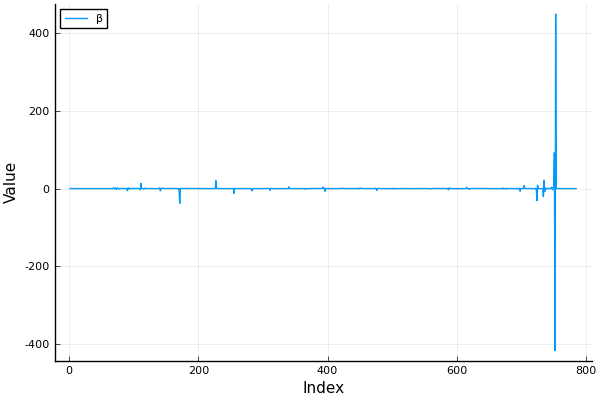

In [50]:
plot(β,label = "β",xlabel = "Index",ylabel ="Value")

In [51]:
#This is the actual classifier it takes an image (matrix or vector) and return -1 or +1 
classify(x) = sign(β'*vcat(1,vec(x))) #one line Julia function classify()

classify (generic function with 1 method)

In [52]:
classify(positiveTrain[:,:,2]), classify(negativeTrain[:,:,2])

(1.0, -1.0)

In [53]:
positiveTest = digitsMNISTtest_x[:,:,digitsMNISTtest_y .== 3]
nPosTest = size(positiveTest)[3]
negativeTest = digitsMNISTtest_x[:,:,digitsMNISTtest_y .== 8]
nNegTest = size(negativeTest)[3]
@show nPosTest, nNegTest;

(nPosTest, nNegTest) = (1010, 974)


In [54]:
truePositives = sum([classify(positiveTest[:,:,i]) .== +1 for i in 1:nPosTest])

968

In [55]:
trueNegatives = sum([classify(negativeTest[:,:,i]) .== -1 for i in 1:nNegTest])

934

**Task 4:** What is the accuracy? What is the precision and recall? What is the $F_1$ score?

Reminder:

$$
\text{Precision} = \frac{\big|\text{true positive}\big|}{\big|\text{true positive}\big| + \big|\text{false positive}\big|},
\qquad
\text{Recall} = \frac{\big|\text{true positive}\big|}{\big|\text{true positive}\big| + \big|\text{false negative}\big|}.
$$

In [58]:
#Solution:
accuracy = (truePositives + trueNegatives)/(nPosTest+nNegTest)

0.9586693548387096

In [60]:
falsePositives = nNegTest - trueNegatives

40

In [61]:
falseNegatives = nPosTest - truePositives

42

In [67]:
precision = truePositives/(truePositives + falsePositives)

0.9603174603174603

In [68]:
recall = truePositives/(truePositives + falseNegatives)

0.9584158415841584

In [66]:
F1 = 1/mean(1 ./ [precision,recall])

0.9593657086223986

**Task 5:** Repeat the above to make a classifier that distingiushes between the `0` digit and `3` digit

In [87]:
positiveTrain = digitsMNISTtrain_x[:,:,digitsMNISTtrain_y .== 3] #select the images that are '3'
nPos = size(positiveTrain)[3]
negativeTrain = digitsMNISTtrain_x[:,:,digitsMNISTtrain_y .== 0] #select '0'
nNeg = size(negativeTrain)[3]
tempPos = vcat([Float32.(vec(positiveTrain[:,:,i]))' for i in 1:nPos]...)  
tempNeg = vcat([Float32.(vec(negativeTrain[:,:,i]))' for i in 1:nNeg]...)
#The dataMatrix (in statistics = design matrix)
A = hcat(ones(nPos+nNeg),vcat(tempPos,tempNeg))
y = vcat(fill(+1,nPos),fill(-1,nNeg)) #These are the labels
β = pinv(A)*y  #use \beta +[TAB] to get a β character
classify(positiveTrain[:,:,2]), classify(negativeTrain[:,:,2])


positiveTest = digitsMNISTtest_x[:,:,digitsMNISTtest_y .== 3]
nPosTest = size(positiveTest)[3]
negativeTest = digitsMNISTtest_x[:,:,digitsMNISTtest_y .== 0]
nNegTest = size(negativeTest)[3]
@show nPosTest, nNegTest;
truePositives = sum([classify(positiveTest[:,:,i]) .== +1 for i in 1:nPosTest])
trueNegatives = sum([classify(negativeTest[:,:,i]) .== -1 for i in 1:nNegTest])
falsePositives = nNegTest - trueNegatives
falseNegatives = nPosTest - truePositives
confusionmatrix = [trueNegatives falsePositives; 
                   falseNegatives truePositives]
display(confusionmatrix)
precision = truePositives/(truePositives + falsePositives)
recall = truePositives/(truePositives + falseNegatives)
F1 = 1/mean(1 ./ [precision,recall])

2×2 Array{Int64,2}:
 977     3
  10  1000

(nPosTest, nNegTest) = (1010, 980)


0.9935419771485345

### CIFAR10
See [CIFAR10 website](https://www.cs.toronto.edu/~kriz/cifar.html)

In [88]:
CIFAR10train_x, CIFAR10train_y = CIFAR10.traindata()
CIFAR10test_x,  CIFAR10test_y  = CIFAR10.testdata()
classNames = CIFAR10.classnames()

10-element Array{String,1}:
 "airplane"
 "automobile"
 "bird"
 "cat"
 "deer"
 "dog"
 "frog"
 "horse"
 "ship"
 "truck"

In [89]:
counts(CIFAR10train_y)

10-element Array{Int64,1}:
 5000
 5000
 5000
 5000
 5000
 5000
 5000
 5000
 5000
 5000

In [90]:
size(CIFAR10train_x) #It is a 4-tensor

(32, 32, 3, 50000)

In [91]:
#The first image
CIFAR10train_x[:,:,:,1]

32×32×3 Array{N0f8,3} with eltype Normed{UInt8,8}:
[:, :, 1] =
 0.231  0.063  0.098  0.129  0.196  …  0.847  0.863  0.816  0.706  0.694
 0.169  0.0    0.063  0.149  0.231     0.757  0.788  0.788  0.678  0.659
 0.196  0.071  0.192  0.341  0.4       0.659  0.729  0.776  0.729  0.702
 0.267  0.2    0.325  0.416  0.498     0.592  0.675  0.749  0.761  0.737
 0.384  0.345  0.431  0.451  0.486     0.514  0.612  0.718  0.776  0.792
 0.467  0.471  0.506  0.459  0.475  …  0.494  0.557  0.671  0.788  0.855
 0.545  0.502  0.51   0.447  0.471     0.541  0.557  0.624  0.741  0.855
 0.569  0.498  0.475  0.412  0.447     0.565  0.6    0.576  0.678  0.812
 0.584  0.494  0.443  0.42   0.42      0.557  0.588  0.529  0.612  0.749
 0.584  0.455  0.439  0.475  0.49      0.537  0.545  0.51   0.545  0.686
 0.514  0.416  0.439  0.49   0.506  …  0.471  0.494  0.545  0.557  0.651
 0.49   0.396  0.416  0.427  0.416     0.514  0.533  0.576  0.569  0.639
 0.557  0.412  0.412  0.443  0.424     0.569  0.58   0.565  0

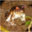

In [92]:
CIFAR10.convert2image(CIFAR10train_x[:,:,:,1])

In [93]:
CIFAR10train_y[1]

6

In [94]:
classNames[CIFAR10train_y[1]+1]

"frog"

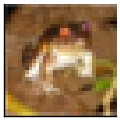

In [95]:
plot(CIFAR10.convert2image(CIFAR10train_x[:,:,:,1]),size=(120,120),ticks=false)

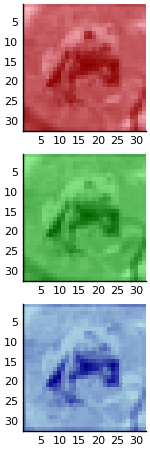

In [96]:
pR = heatmap(CIFAR10train_x[:,:,1,1]',yflip=true,color=:reds,legend=false,size=(150,150),label="Red")
pG = heatmap(CIFAR10train_x[:,:,2,1]',yflip=true,color=:greens,legend=false,size=(150,150))
pB = heatmap(CIFAR10train_x[:,:,3,1]',yflip=true,color=:blues,legend=false,size=(150,150))
plot(pR,pG,pB,layout=(3,1),size=(150,450))

In [97]:
first5Frogs = CIFAR10train_x[:,:,:,CIFAR10train_y .== 6][:,:,:,1:5]; #label 6 is "frog"
size(first5Frogs)

(32, 32, 3, 5)

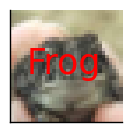

┌ Info: Saved animation to 
│   fn = /Users/uqjnazar/Dropbox/DeepLearning/MathematicalEngineeringDeepLearning/Practical_Unit1/frogs.gif
└ @ Plots /Users/uqjnazar/.julia/packages/Plots/8GUYs/src/animation.jl:102


Plots.AnimatedGif("/Users/uqjnazar/Dropbox/DeepLearning/MathematicalEngineeringDeepLearning/Practical_Unit1/frogs.gif")
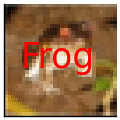

In [98]:
anim = Animation()

for frog in 1:5
    plot(CIFAR10.convert2image(first5Frogs[:,:,:,frog]),size=(120,120),ticks=false)
    annotate!(16, 16, text("Frog", :center, :center, 25,:red))
    frame(anim) #adds to the animation
end

cd(@__DIR__)
gif(anim, "frogs.gif", fps = 2) #saves the animation with 2 frames per second

**Task 6:** Create an animation that goes through the first 100 images and presents the label of each image as red text.

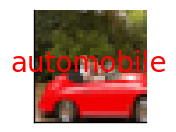

┌ Info: Saved animation to 
│   fn = /Users/uqjnazar/Dropbox/DeepLearning/MathematicalEngineeringDeepLearning/Practical_Unit1/first100.gif
└ @ Plots /Users/uqjnazar/.julia/packages/Plots/8GUYs/src/animation.jl:102


Plots.AnimatedGif("/Users/uqjnazar/Dropbox/DeepLearning/MathematicalEngineeringDeepLearning/Practical_Unit1/first100.gif")
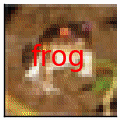

In [102]:
anim = Animation()

for i in 1:100
    plot(CIFAR10.convert2image(CIFAR10train_x[:,:,:,i]),size=(120,120),ticks=false)
    annotate!(16, 16, text(classNames[CIFAR10train_y[i]+1], :center, :center, 20,:red))
    frame(anim) #adds to the animation
end

cd(@__DIR__)
gif(anim, "first100.gif", fps = 2) #saves the animation with 2 frames per second